# 02 — RQ2: Review Comments & Resolution Dynamics

This notebook reproduces all results for **RQ2** of the MSR 2026 Challenge Track artifact.

It automatically:
- Loads the AIDev review comment dataset from HuggingFace
- Cleans comments (stage-1 & stage-2 filters)
- Performs rule-based classification (correctness, style, testing, etc.)
- Computes agent-level comment type distribution
- Computes resolution rates (whether comments triggered extra commits)
- Generates all tables and visualizations

**The heavy computation logic is implemented in:**
```
msr2026/rq2/run_rq2.py
```

## 1. Import & Setup

In [1]:
import sys, os
sys.path.append("../src")

from src.msr2026.rq2.run_rq2 import run_rq2

import pandas as pd
from IPython.display import Image, display

print("Environment ready.")

Environment ready.


## 2. Run the full RQ2 pipeline

This will generate:
- Cleaned comment table
- Comment-type count matrix
- Resolution matrix
- Stacked bar chart (comment distribution)
- Resolution heatmap

All output goes to:
```
output/tables/RQ2/
output/figures/RQ2/
```

In [2]:
run_rq2()
print("✔ RQ2 pipeline completed.")


===================== Running RQ2 =====================
Loading RQ2 data from HuggingFace...

=== Cleaning Stage 1 ===
After Stage 1: 21,753 comments

=== Cleaning Stage 2 ===
After Stage 2: 18,551 comments

=== Classifying comments ===


E:\ubc study\MSR-paper\MSR-2026\src\msr2026\rq2\run_rq2.py:122: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["short_body"].str.contains(pattern, case=False, regex=True, na=False),
E:\ubc study\MSR-paper\MSR-2026\src\msr2026\rq2\run_rq2.py:122: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["short_body"].str.contains(pattern, case=False, regex=True, na=False),
E:\ubc study\MSR-paper\MSR-2026\src\msr2026\rq2\run_rq2.py:122: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["short_body"].str.contains(pattern, case=False, regex=True, na=False),
E:\ubc study\MSR-paper\MSR-2026\src\msr2026\rq2\run_rq2.py:122: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, u


Saving CSV outputs...
✔ Comment distribution tables saved.

=== Generating Figure 1b — Normalized Comment Distribution ===
✔ Resolution matrix saved.

=== Generating Figure 2 — Resolution Heatmap ===

✔ RQ2 completed — Figures saved to: ../output/figures/RQ2
✔ RQ2 CSV tables saved to: ../output/tables/RQ2
✔ RQ2 pipeline completed.


## 3. Load and Display All CSV Outputs

RQ2 produces the following tables:

- `rq2_type_counts_raw.csv`  Raw count of all comment types per agent (including "other")
- `rq2_type_counts_filtered.csv`  Cleaned comment type distribution (without "other")
- `rq2_type_distribution_pct.csv`  Normalized 100% stacked distribution per agent
-`rq2_resolution_matrix.csv`  Resolution rate per agent × comment type


In [4]:
# ======================================================
# 3. Load and Display All CSV Outputs (Matching RQ2)
# ======================================================

TABLE_DIR = "../output/tables/RQ2/"

# Load CSVs exactly as generated by RQ2 pipeline
type_counts_raw = pd.read_csv(TABLE_DIR + "rq2_type_counts_raw.csv")
type_counts_filtered = pd.read_csv(TABLE_DIR + "rq2_type_counts_filtered.csv")
type_pct = pd.read_csv(TABLE_DIR + "rq2_type_distribution_pct.csv")
resolution = pd.read_csv(TABLE_DIR + "rq2_resolution_matrix.csv")

print("=== Raw Comment Type Counts (raw, includes 'other') ===")
display(type_counts_raw)

print("=== Filtered Comment Type Counts (without 'other') ===")
display(type_counts_filtered)

print("=== Comment Type Distribution % (Normalized 100% Stacked) ===")
display(type_pct)

print("=== Resolution Matrix (Agent × Comment Type) ===")
display(resolution)


=== Raw Comment Type Counts (raw, includes 'other') ===


,agent,correctness,documentation,other,security,style,testing
0,Claude_Code,20,12,303,4,2,12
1,Copilot,817,698,9481,43,238,1145
2,Cursor,54,25,470,2,63,41
3,Devin,188,134,2795,10,198,134
4,OpenAI_Codex,115,116,1268,6,61,96


=== Filtered Comment Type Counts (without 'other') ===


,agent,correctness,documentation,security,style,testing
0,Claude_Code,20,12,4,2,12
1,Copilot,817,698,43,238,1145
2,Cursor,54,25,2,63,41
3,Devin,188,134,10,198,134
4,OpenAI_Codex,115,116,6,61,96


=== Comment Type Distribution % (Normalized 100% Stacked) ===


,agent,correctness,documentation,security,style,testing
0,Claude_Code,0.400000,0.240000,0.080000,0.040000,0.240000
1,Copilot,0.277797,0.237334,0.014621,0.080925,0.389323
2,Cursor,0.291892,0.135135,0.010811,0.340541,0.221622
3,Devin,0.283133,0.201807,0.015060,0.298193,0.201807
4,OpenAI_Codex,0.291878,0.294416,0.015228,0.154822,0.243655


=== Resolution Matrix (Agent × Comment Type) ===


,agent,correctness,documentation,other,security,style,testing
0,Claude_Code,0.800000,0.583333,0.834983,1.0,1.000000,0.833333
1,Copilot,0.977968,0.981375,0.980065,1.0,0.991597,0.976419
2,Cursor,0.907407,0.880000,0.902128,0.5,0.857143,0.804878
3,Devin,0.946809,0.947761,0.965295,0.8,0.909091,0.985075
4,OpenAI_Codex,0.730435,0.741379,0.789432,1.0,0.688525,0.791667


## 4. Display All Generated Figures
Figures include:
- Normalized comment-type stacked bar chart
- Resolution heatmap


Generated figures:
- rq2_comment_distribution.png


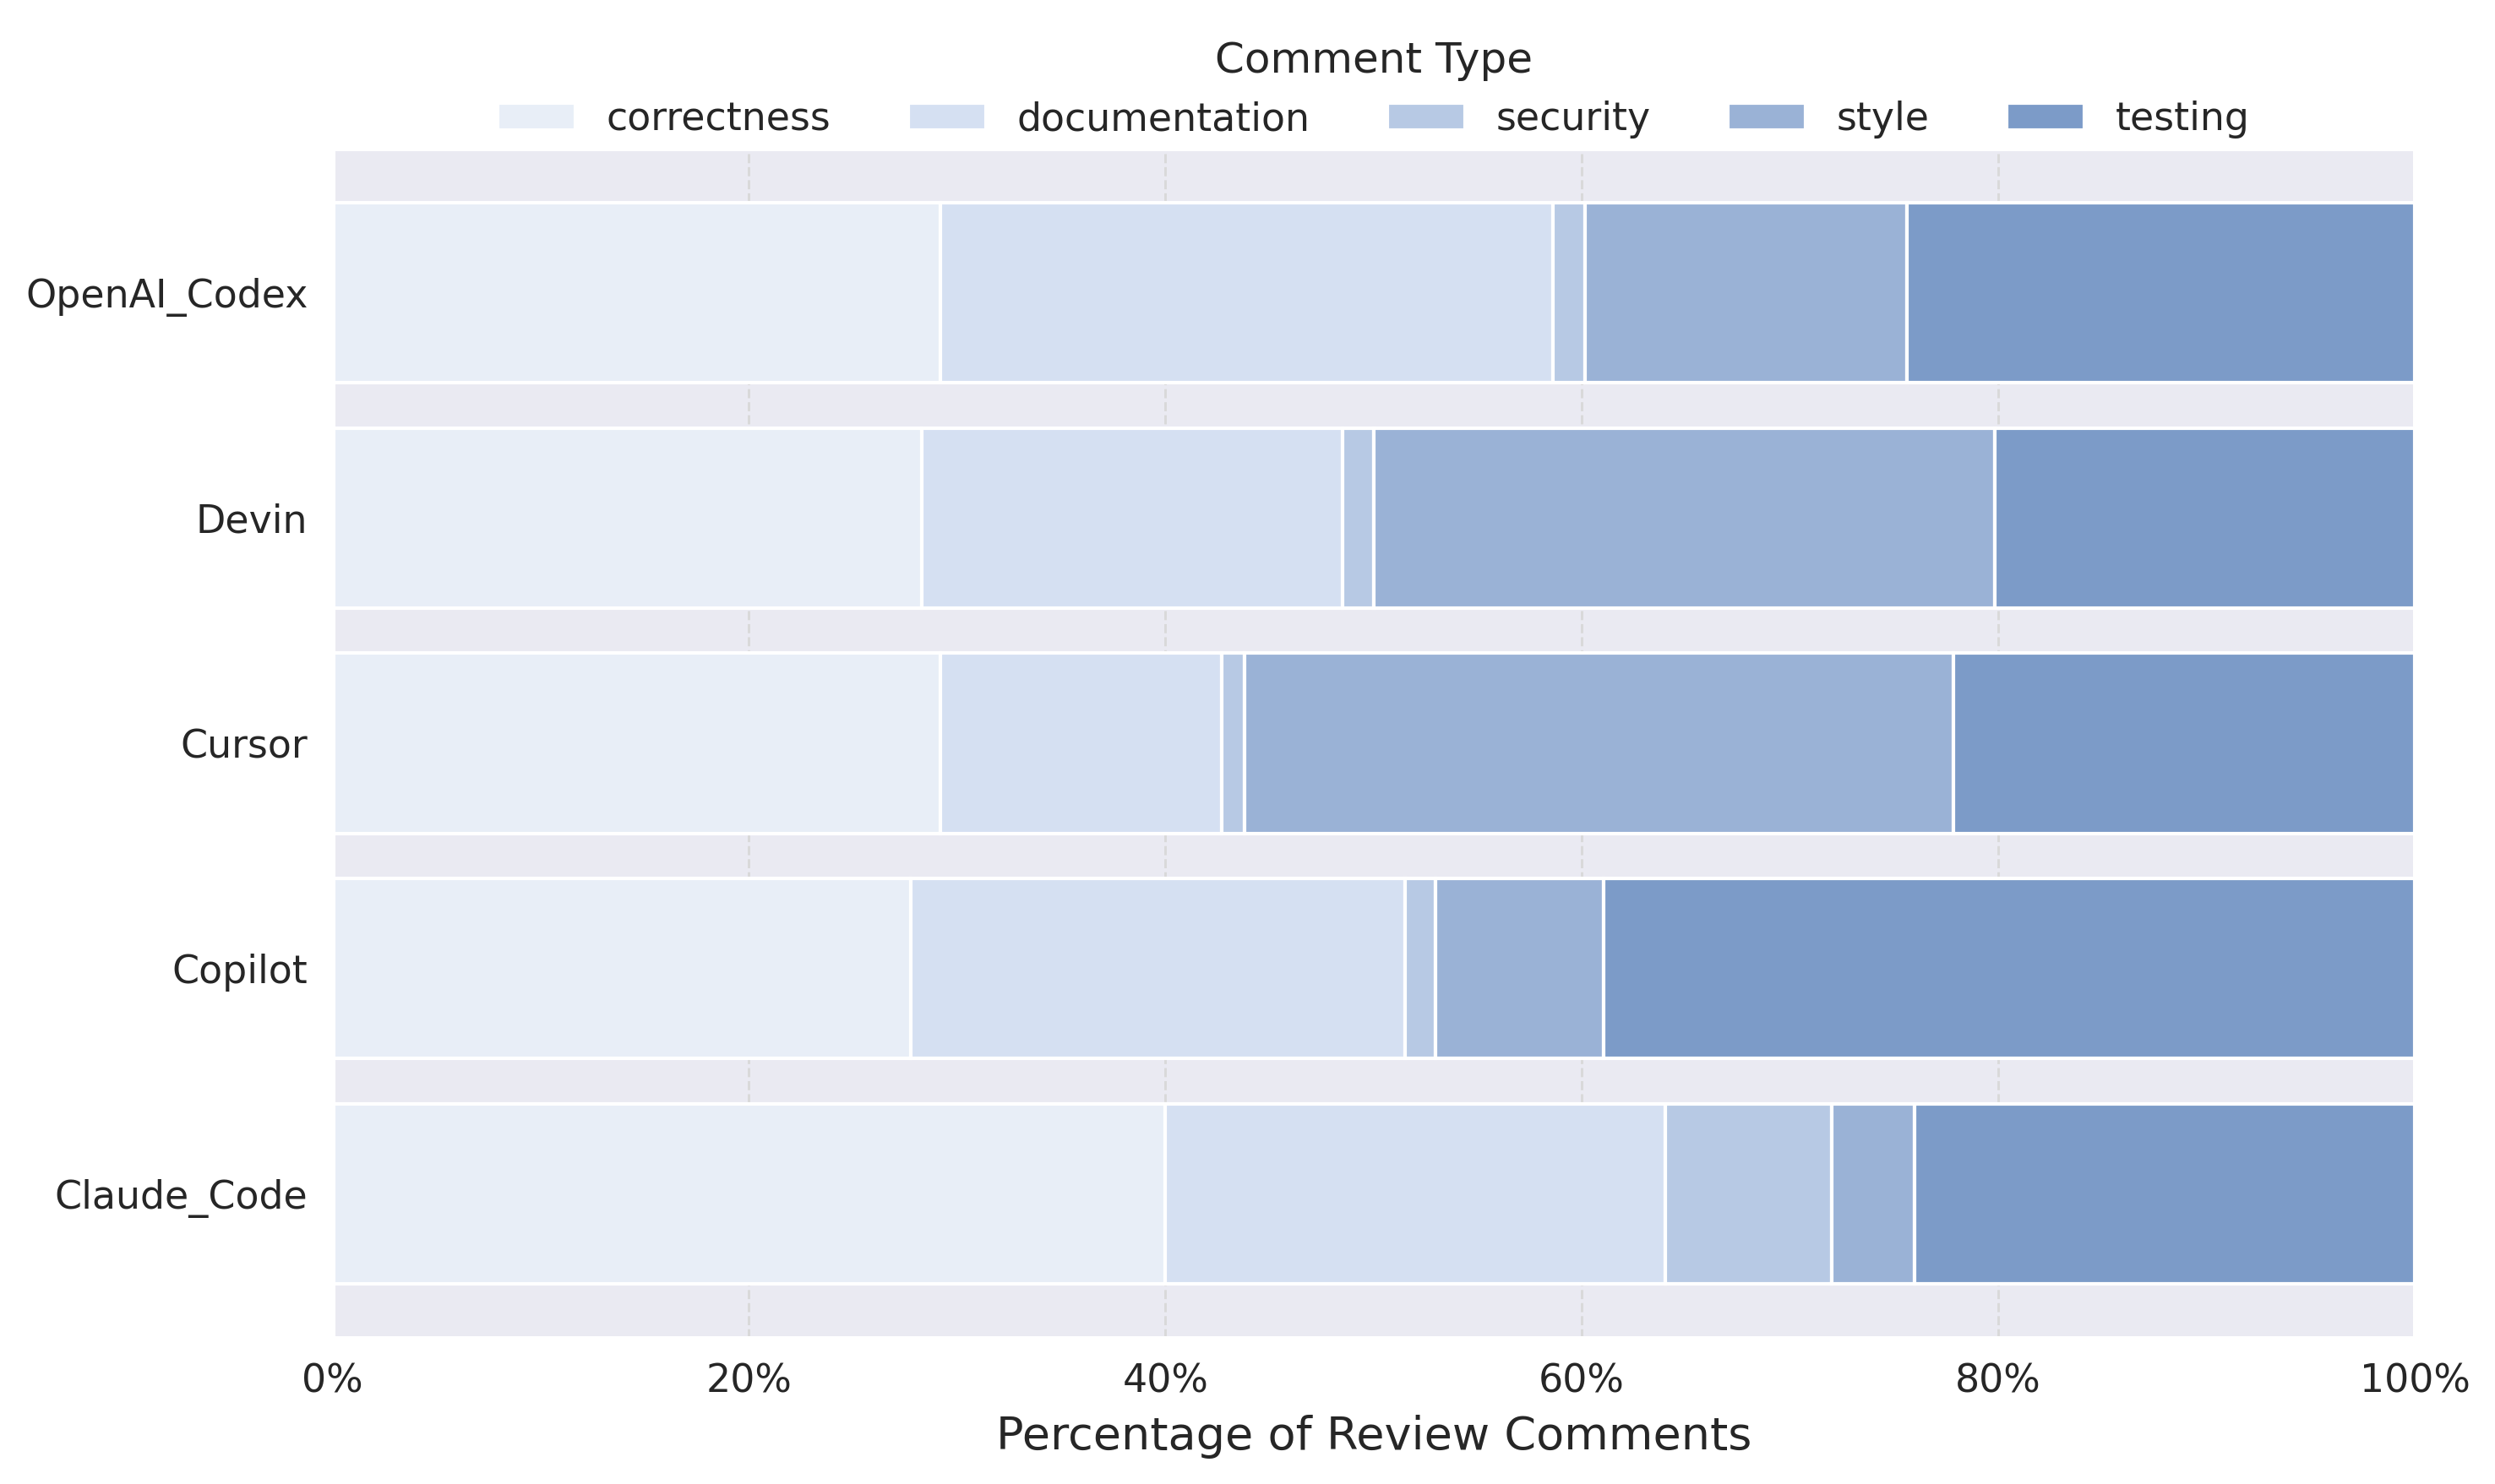

- rq2_resolution_heatmap.png


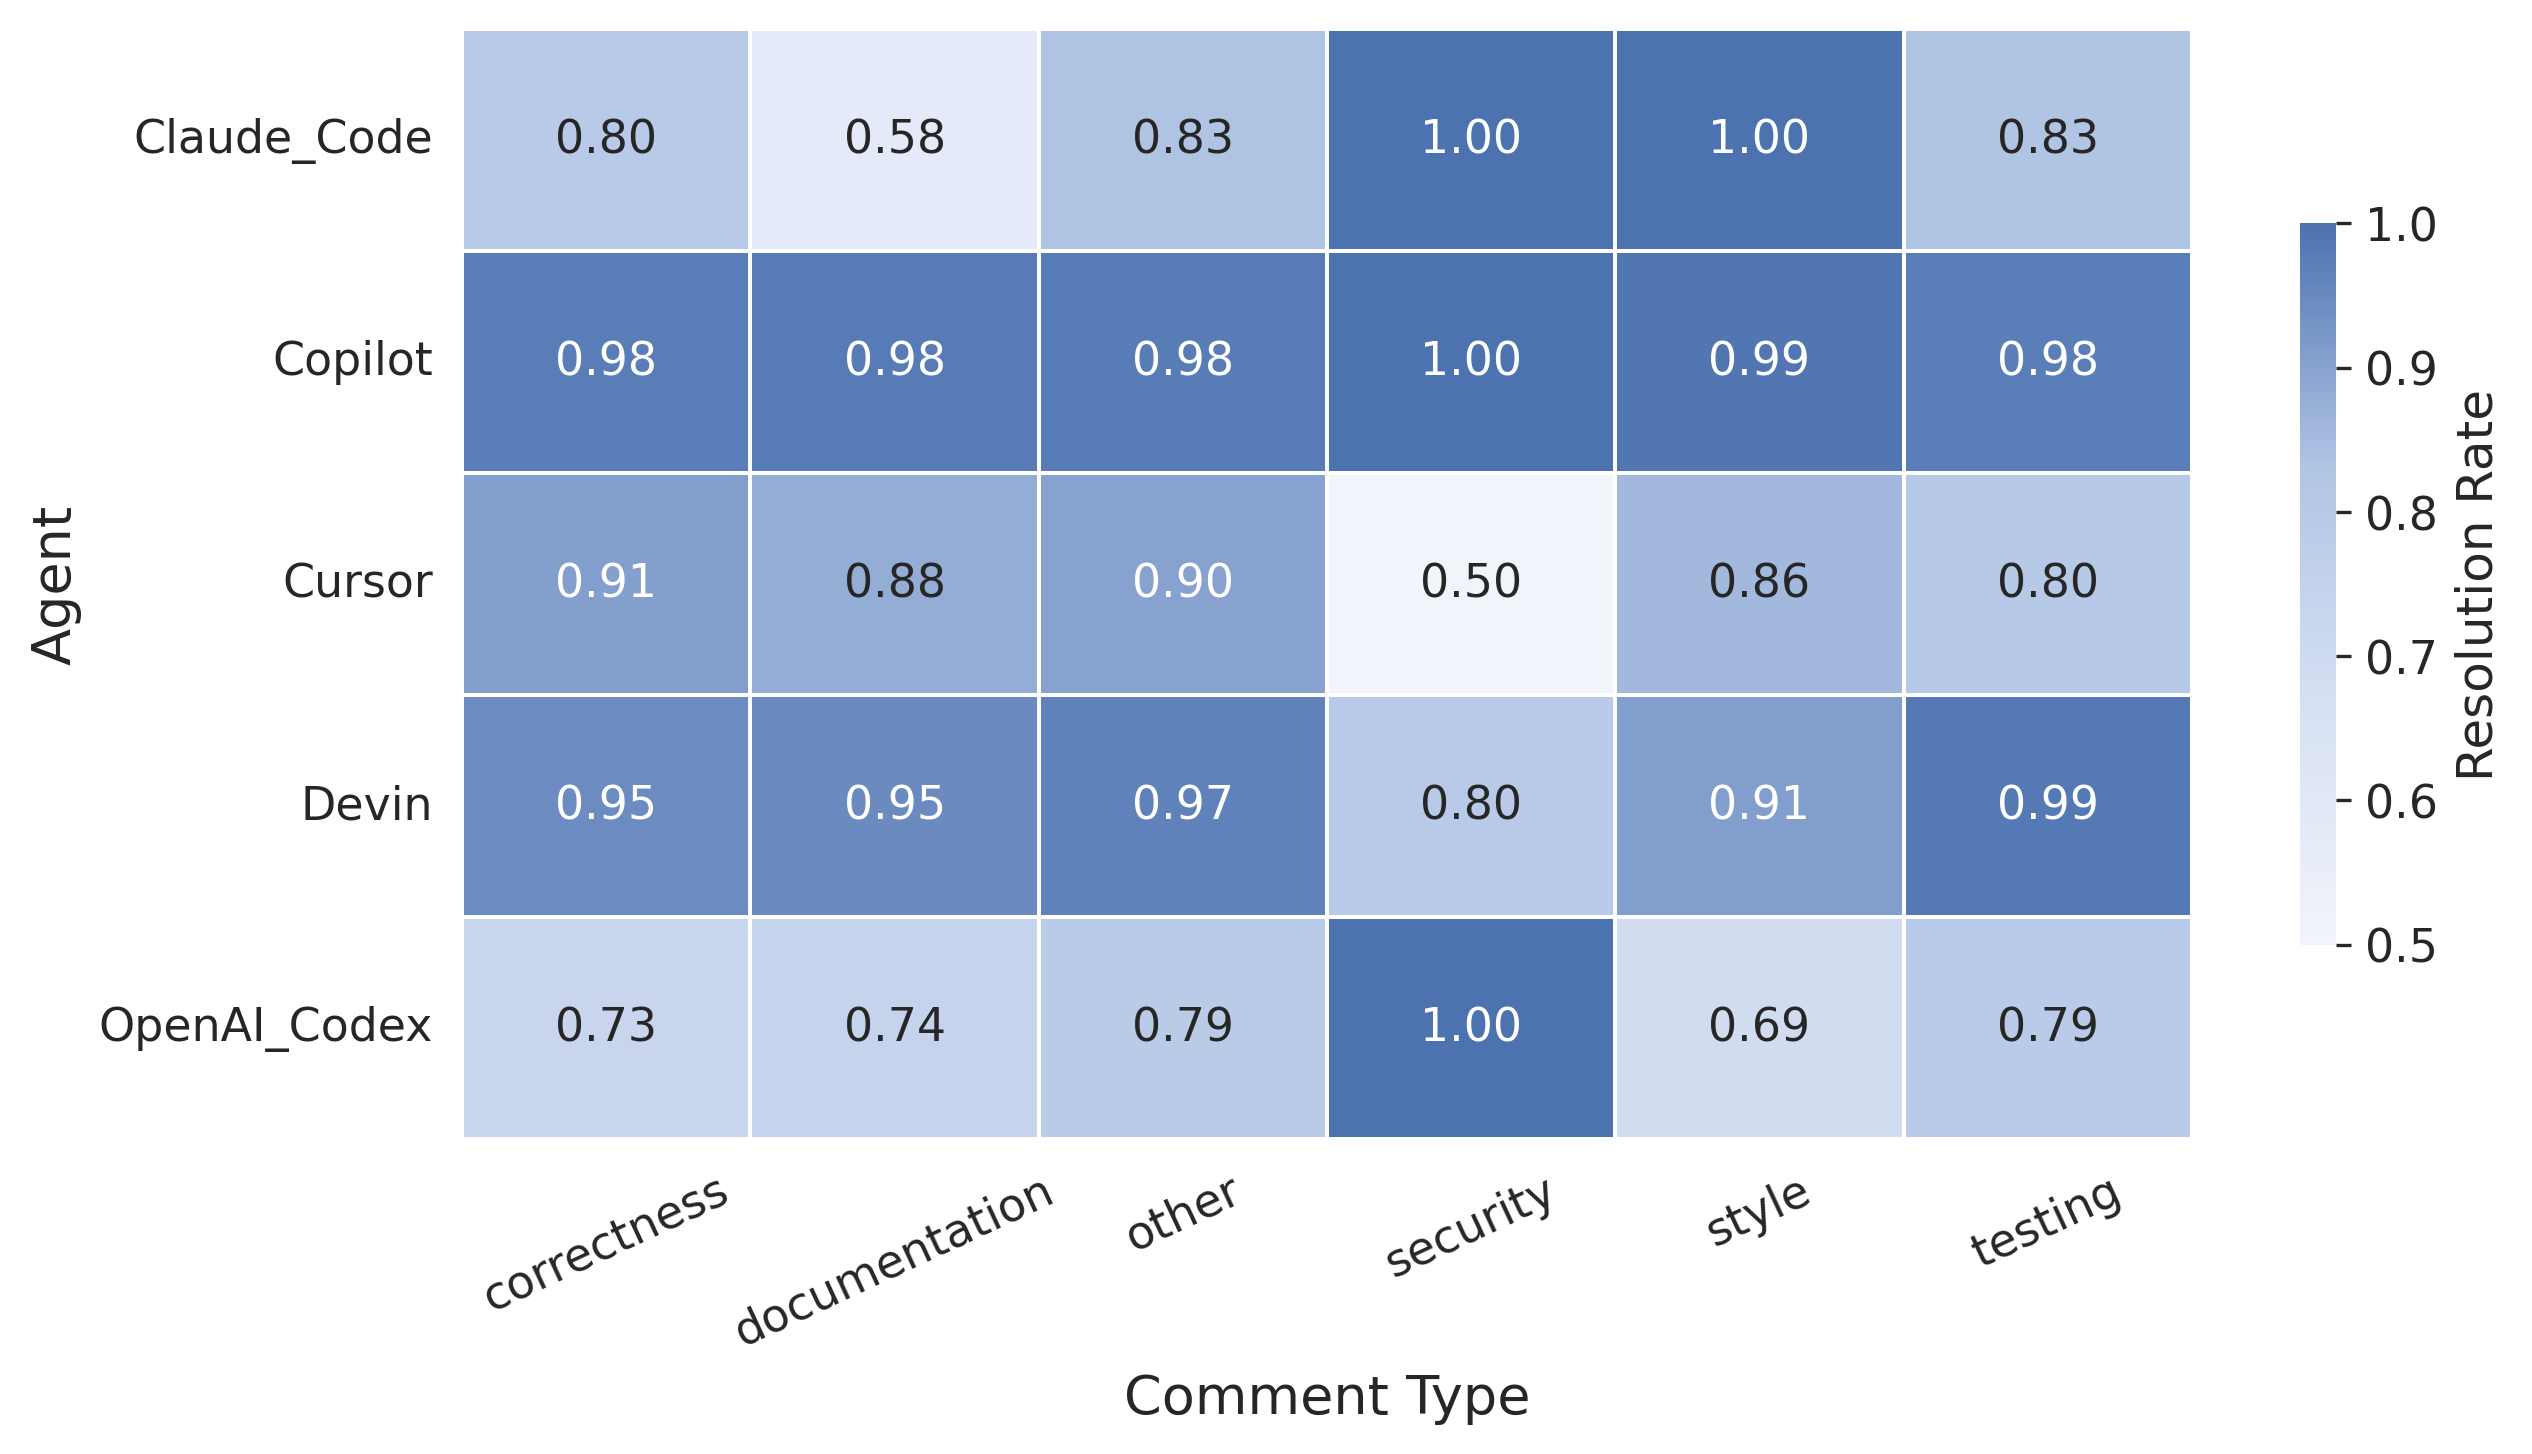

In [5]:
FIG_DIR = "../output/figures/RQ2/"

print("Generated figures:")
for f in os.listdir(FIG_DIR):
    if f.endswith(".png"):
        print("-", f)
        display(Image(filename=os.path.join(FIG_DIR, f)))